In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import glob
import os
from statistics import mean
import pandas as pd

/tmp/ipykernel_802/557485693.py:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm=plt.cm.get_cmap('rainbow')


[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0] []


ValueError: x and y must have same first dimension, but have shapes (21,) and (0,)

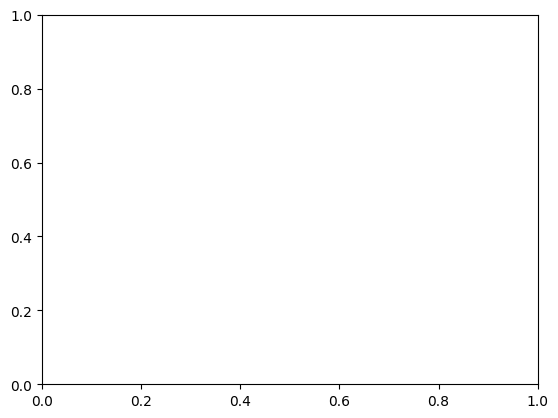

In [5]:
#フラクタル次元表示プログラム
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#固着確率用リスト
p_list=[]
for i in range(1,11,3):
    # p_list.append("{:.2f}".format(i/10))
    p_list.append(i/10)
    
#電圧用リスト
V_list=[]
for i in range(1,4):
    V_list.append(i*1.0)
    
#アルファ用リスト
alpha_list=[]
for i in range(0,11):
    # alpha_list.append("{:.2f}".format(i/10))
    alpha_list.append(i/10)

#alpha_list=[1.0,1.2,1.4,1.8,2.0,2.2]

for i in range(12,25,2):
    # alpha_list.append("{:.2f}".format(i/10))
    alpha_list.append(i/10)
    
#Df用リスト
total_Df_list=[[[[]for k in range(0,21)] for j in range(0,len(alpha_list))]for i in range(0,len(p_list))]

DIR1="/mnt/d/master_thesis_data/densim_data/sim_data/C=0.187500_V=1.000000/analisis_data/P="
DIR2="/Correlation_function_data/alpha="
for i in range(len(p_list)):
    #フォルダ名取得&並べ替え(alpha小さい順)
    for j in range(len(alpha_list)):
        prob=p_list[i]
        alpha=alpha_list[j]
        #print(str(alpha))
        Cor_func_list = glob.glob(DIR1+str(prob)+DIR2+str(alpha)+'/Cor_func_*.dat')
        #Cor_func_list = glob.glob('data/C=0.187500_V=1.000000/analisis_data/P='+str(prob)+'*/Correlation_function_data/alpha=2.40/Cor_func_*.dat')
        Cor_func_list.sort(reverse=False,key=natural_keys)
        #print(Cor_func_list)
        
        #print(Cor_func_list)
        #リスト定義
        Cor_func=[[] for k in range(len(Cor_func_list))]
        D_f=[[]for k in range (len(Cor_func_list))]
        D_f_err=[[]for k in range (len(Cor_func_list))]

        #print(Cor_func_list[0][102:-4])
    #データ読み込み
        #print(Cor_func_list[0][94:-4])
        for k in range(0,len(Cor_func_list)): #あるP,あるalphaに対して、deta indexで読み込み
            str_Cor_func=Cor_func_list[k] #string　of file name
            index=float(str_Cor_func[136:-4]) #data index
            tmp=np.loadtxt(Cor_func_list[k])
            Cor_func[k]=[index,tmp]

            #print(Cor_func[k][1][0][0])
            
    #フラクタル次元計算
            R_g=Cor_func[k][1][0][0]#回転半径    
            r=np.log2(Cor_func[k][1][:,1])
            C_r=np.log2(Cor_func[k][1][:,2])
            for l in range (0,len(Cor_func[k][1][:,2])):#線型フィットのindexを求める
                if (np.log2(R_g)<r[l]):
                    n_max=l-1 #何個めのデータで回転半径を越えるか
                    break
            z=np.polyfit(r[1:n_max],C_r[1:n_max],1) 

            r_line=np.arange(1,max(r)) #線型フィットの区間
            L = np.poly1d(z) #求めたa,bを1次式で表示,ax+b
            Df=round(2+z[0],5) #フラクタル次元2+a,a<0なので2未満になる。偶数への丸め。
            total_Df_list[i][j][k]=[p_list[i],alpha_list[j],Df]
#errbar付フラクタル次元
data_alpha=[[]for j in range(len(alpha_list))]
tuples=[[]for j in range(len(alpha_list))]
# print(total_Df_list[0][17][0])
# print(total_Df_list[0][18][0])

# # #std
# fig, ax = plt.subplots()
# cm = plt.cm.get_cmap('rainbow')
# for i in range(len(p_list)):
    
#      #各固着確率毎のDataFrameを作成
#     for j in range(0,len(alpha_list)):
#         data_count=[]
#         for k in range(len(Cor_func_list)):
#             data_count.append(total_Df_list[i][j][k][2])

#         data_alpha[j]=data_count
#         tuples[j]=[p_list[i],alpha_list[j]]
    
#     multi_index=pd.MultiIndex.from_tuples(tuples,name=("p","alpha"))
#     data=pd.DataFrame(data_alpha,index=multi_index)
    
#     x=[]
#     y=[]
#     y_err=[]
#     #エラーバー作成
#     for j in range(len(alpha_list)):
#         yerr_std = data.loc[(p_list[i],alpha_list[j])].std() #標準偏差
#         y_mean = data.loc[(p_list[i],alpha_list[j])].mean()

#         x.append(alpha_list[j])
#         y.append(y_mean)
#         y_err.append(yerr_std)
 

#     ax.plot(x, y, marker='o',label=r"$P$="+str(p_list[i]),color=cm(p_list[i]))
#     hans, labs = ax.get_legend_handles_labels()
#     ax.errorbar(x, y, yerr=y_err, capsize=3, fmt='o', ecolor=cm(p_list[i]), ms=7, mfc='None', mec=cm(p_list[i]))
#     ax.set_xlabel(r"parameter $\alpha$",fontsize=20)
#     ax.set_ylabel(r"fractal dimension $D_f$",fontsize=20)
#     ax.set_ylim(1.55,1.90)
#     plt.xticks(rotation=45)
#     ax.set_xlim(-0.1,2.5)
#     ax.set_title('error bar : std')
#     ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20,handles=hans[::-1], labels=labs[::-1])

# plt.show()
# plt.close(fig)

#scope
fig, ax = plt.subplots()
cm=plt.cm.get_cmap('rainbow')

#for i in range(len(p_list)):
for i in range(0,1):

     #各固着確率毎のDataFrameを作成
    for j in range(len(alpha_list)):
        data_count=[]
        for k in range(0,len(Cor_func_list)):
            data_count.append(total_Df_list[i][j][k][2])

        data_alpha[j]=data_count
        tuples[j]=[p_list[i],alpha_list[j]]
    
    multi_index=pd.MultiIndex.from_tuples(tuples,name=("p","alpha"))
    data=pd.DataFrame(data_alpha,index=multi_index)
    
    # print(f'data:            \n{data}\n')

    x=[]
    y=[]
    y_err=[]
    y_all=[]
    x_all=[]
    #エラーバー作成
    for j in range(len(alpha_list)):
        yerr_scope=data.loc[(p_list[i],alpha_list[j])].max() - data.loc[(p_list[i],alpha_list[j])].min() #最大最小の差
        y_mean = data.loc[(p_list[i],alpha_list[j])].mean()
        y_all=np.array(data.loc[(p_list[i],alpha_list[j])],dtype=object)
        x_all=np.array([alpha_list[j]]*21,dtype=object)
        print(x_all,y_all)
        ax.plot(x_all, y_all, marker='o',color=cm(p_list[i]),linestyle='none')
        
        x.append(alpha_list[j])
        y.append(y_mean)
        #y_err.append(yerr_scope)
 
    ax.plot(x, y, marker='o',label=r"$P$="+str(p_list[i]),color=cm(p_list[i]),mec='r')
    hans, labs = ax.get_legend_handles_labels()
    #ax.errorbar(x, y, yerr=y_err, capsize=3, fmt='o', ecolor=cm(p_list[i]), ms=7, mfc='None', mec=cm(p_list[i]))
    ax.set_xlabel(r"parameter $\alpha$",fontsize=20)
    ax.set_ylabel(r"fractal dimension $D_f$",fontsize=20)
    plt.xticks(rotation=45)
    ax.set_title('error bar : scope')
    ax.set_ylim(1.55,1.90)
    ax.set_xlim(-0.1, 2.5)
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20,handles=hans[::-1], labels=labs[::-1])

plt.show()

000


<function matplotlib.pyplot.show(close=None, block=None)>

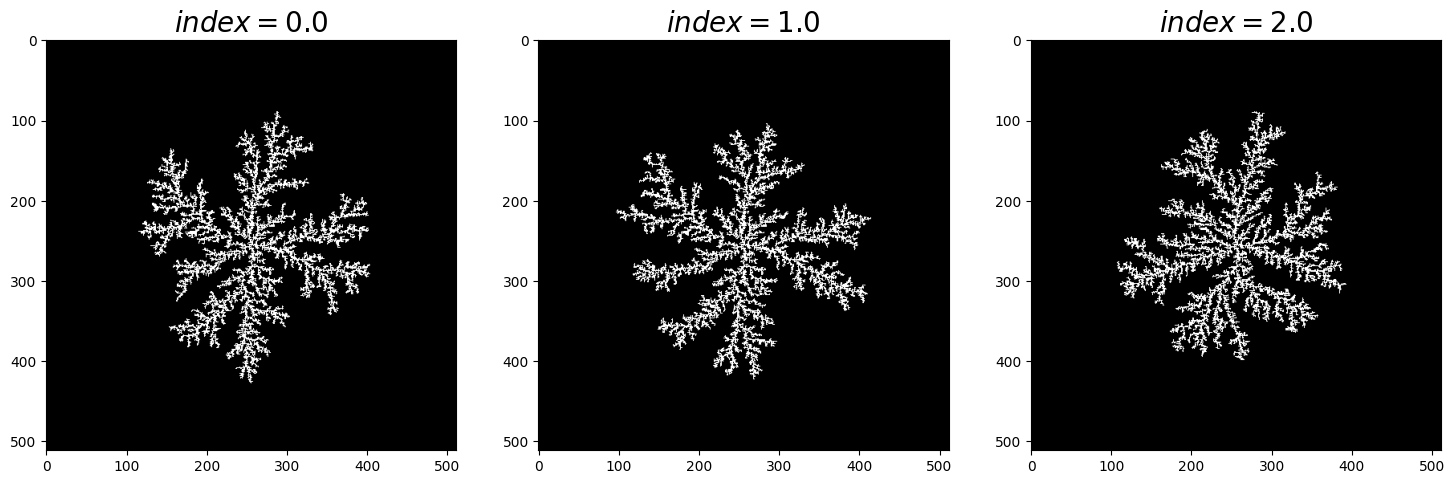

<Figure size 1800x600 with 0 Axes>

In [3]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=3/16
prob=1.0
DLA_list = glob.glob('test/C=0.187500_V=1.000000/A=-3.00_B=0.10_C=0.01/DLA_data/alpha=1.00/DLA_*.dat')
#DLA_list = glob.glob('data/C='+str(const)+'*/P='+str(prob)+'*/DLA_data/DLA_alpha=*.dat')
#DLA_list = glob.glob('test/C=0.187500_V=1.000000/A=0.8_B=0.5_C=0.01/DLA_data/alpha=*/DLA_*.dat')
DLA_list.sort(reverse=False,key=natural_keys)

#リスト定義
DLA=[[] for i in range(len(DLA_list))]

print(DLA_list[0][73:-4])
#データ読み込み
for i in range(0,len(DLA_list)):
    str_DLA=DLA_list[i] #string　of file name
    alpha=float(str_DLA[73:-4]) #return alpha
    #alpha=int(str_DLA[74:-4]) #return index
    tmp=np.loadtxt(DLA_list[i])
    DLA[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )

fig=plt.figure(figsize=(6*column,6*row))

for i in range(0,len(DLA_list)): #全出力
    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$index=$"+str(DLA[i][0]),fontsize=20)
    plt.imshow(DLA[i][1], cmap="gray")
plt.show

#繰り返し#
DLA_list = glob.glob('C:/Users/PC/Desktop/Master_Thesis/test/C=0.187500_V=1.000000/A=0.5_B=0.5_C=0.01/DLA_data/alpha=0.00/DLA_*.dat')

#リスト定義
DLA=[[] for i in range(len(DLA_list))]

#print(DLA_list[0][104:-4])
#データ読み込み
for i in range(0,len(DLA_list)):
    str_DLA=DLA_list[i] #string　of file name
    alpha=float(str_DLA[104:-4]) #return alpha
    #alpha=int(str_DLA[74:-4]) #return index
    tmp=np.loadtxt(DLA_list[i])
    DLA[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )

fig=plt.figure(figsize=(6*column,6*row))

for i in range(0,len(DLA_list)): #全出力
    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$index=$"+str(DLA[i][0]),fontsize=20)
    plt.imshow(DLA[i][1], cmap="gray")
plt.show


# fig=plt.figure(figsize=(18,6))

# i=0
# j=1
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$\alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# i=5
# j=2
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$/alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# i=11
# j=3
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$/alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# plt.show


In [9]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=3/16
prob=0.1
Phi_list = glob.glob('/mnt/c/Users/PC/Desktop/Master_Thesis/test/data/C='+str(const)+'*/P='+str(prob)+'*/Phi_data/Phi_alpha=*.dat')
Phi_list.sort(reverse=False,key=natural_keys)
print(Phi_list)

#リスト定義
Phi=[[] for i in range(len(Phi_list))]

#データ読み込み
for i in range(0,len(Phi_list)):
    str_Phi=Phi_list[i] #string　of file name
    alpha=float(str_Phi[46:-4]) #alpha
    tmp=np.loadtxt(Phi_list[i])
    Phi[i]=[alpha,tmp]

column=3
row=int((len(Phi_list)-len(Phi_list)%column)/column+1 )
N=512 #メッシュ分割数

fig=plt.figure(figsize=(6*column,6*row))
for i in range(0,len(Phi_list)):
    Phi_value=Phi[i][1][:,2].reshape([N,N])
    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$\alpha=$"+str(Phi[i][0]),fontsize=20)
    plt.imshow(Phi_value)
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both')  

plt.show


[]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x600 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x600 with 0 Axes>

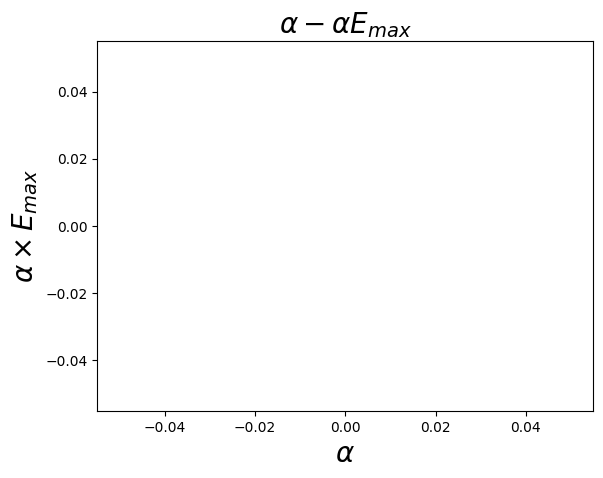

In [5]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=3/16
prob=1.0
El_list = glob.glob('data/C='+str(const)+'*/V='+str(prob)+'*/El_data/El_alpha=*.dat')
El_list.sort(reverse=False,key=natural_keys)

#リスト定義
El=[[] for i in range(len(El_list))]

#データ読み込み
for i in range(0,len(El_list)):
    str_El=El_list[i] #string　of file name
    alpha=float(str_El[44:-4]) #alpha
    tmp=np.loadtxt(El_list[i])
    El[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )
N=512 #メッシュ分割数

fig=plt.figure(figsize=(6*column,6*row))

for i in range(0,len(El_list)):
    El_value=El[i][1][:,3].reshape([N-2,N-2])
    Ex_max=max(El[i][1][:,3])
    Ey_max=max(El[i][1][:,4])
    E_max=max(El[i][1][:,2])

    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$\alpha=$"+str(El[i][0])+" , E_max="+str(E_max)+"\n Ex_max="+str(Ex_max)+"\n Ey_max="+str(Ey_max))
    plt.imshow(El_value)
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both')  

plt.show

x=[[] for i in range(len(El_list))]
y=[[] for i in range(len(El_list))]

for i in range(0,len(El)):
    x[i]=El[i][0]
    y[i]=El[i][0]*max(El[i][1][:,2])

fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"$\alpha\times E_{max}$",fontsize=20)
plt.title(r"$\alpha-\alpha E_{max}$",fontsize=20)

plt.show

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 101.0, 236.0, 1196.0, 2735.0, 7343.0]


<function matplotlib.pyplot.show(close=None, block=None)>

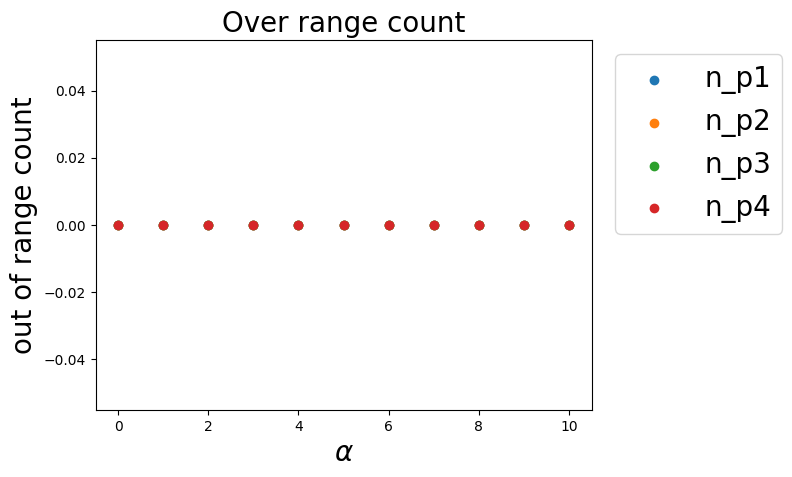

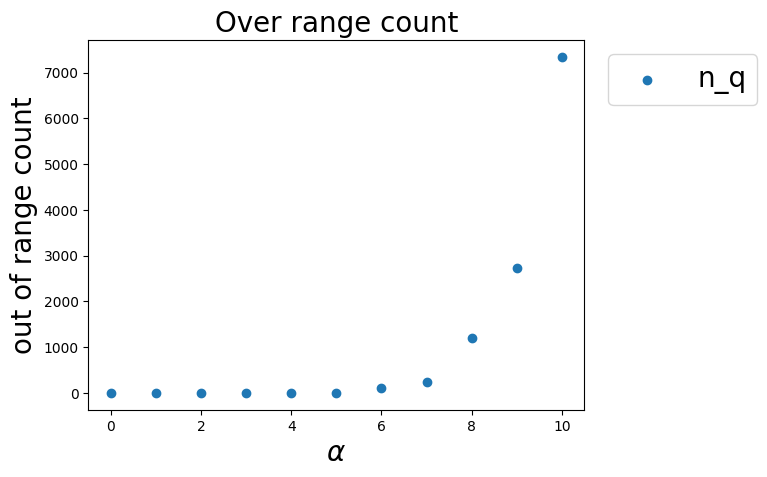

In [5]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=3/16
prob=0.1
other_list = glob.glob('data/C='+str(const)+'*/P='+str(prob)+'*/other_data/other_alpha=*.dat')
other_list.sort(reverse=False,key=natural_keys)

#リスト定義
other=[[] for i in range(len(other_list))]

#データ読み込み
for i in range(0,len(other_list)):
    str_other=other_list[i] #string　of file name
    alpha=float(str_other[50:-4]) #alpha
    tmp=np.loadtxt(other_list[i])
    other[i]=[alpha,tmp]
    
#変数設定
x=[[] for i in range(len(other_list))]
y=[[[]for j in range (len(other))] for i in range(len(other[0][1]))]
label=[[]for i in range (len(other[0][1]))]

for j in range(0,len(other[0][1])):
    for i in range(0,len(other)): 
        x[i]=other[i][0]
        y[j][i]=other[i][1][j]

label=[r"$alpha$","n_p1","n_p2","n_p3","n_p4","n_q"]

print(x,y[5])

fig,ax=plt.subplots()
for i in range(1,len(other[0][1])-1):
    ax.scatter(x,y[i],label=label[i])

ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"out of range count",fontsize=20)
plt.title("Over range count",fontsize=20)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20)

fig,ax=plt.subplots()
ax.scatter(x,y[5],label=label[5])

ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"out of range count",fontsize=20)
plt.title("Over range count",fontsize=20)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20)


plt.show

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
['/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=0.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=1.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=2.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=3.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=4.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=5.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=6.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=7.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA_alpha=8.000000.dat', '/mnt/d/master_thesis_data/densim_data/sim_data/C=0.1875/P=1.0/DLA_data/DLA

<function matplotlib.pyplot.show(close=None, block=None)>

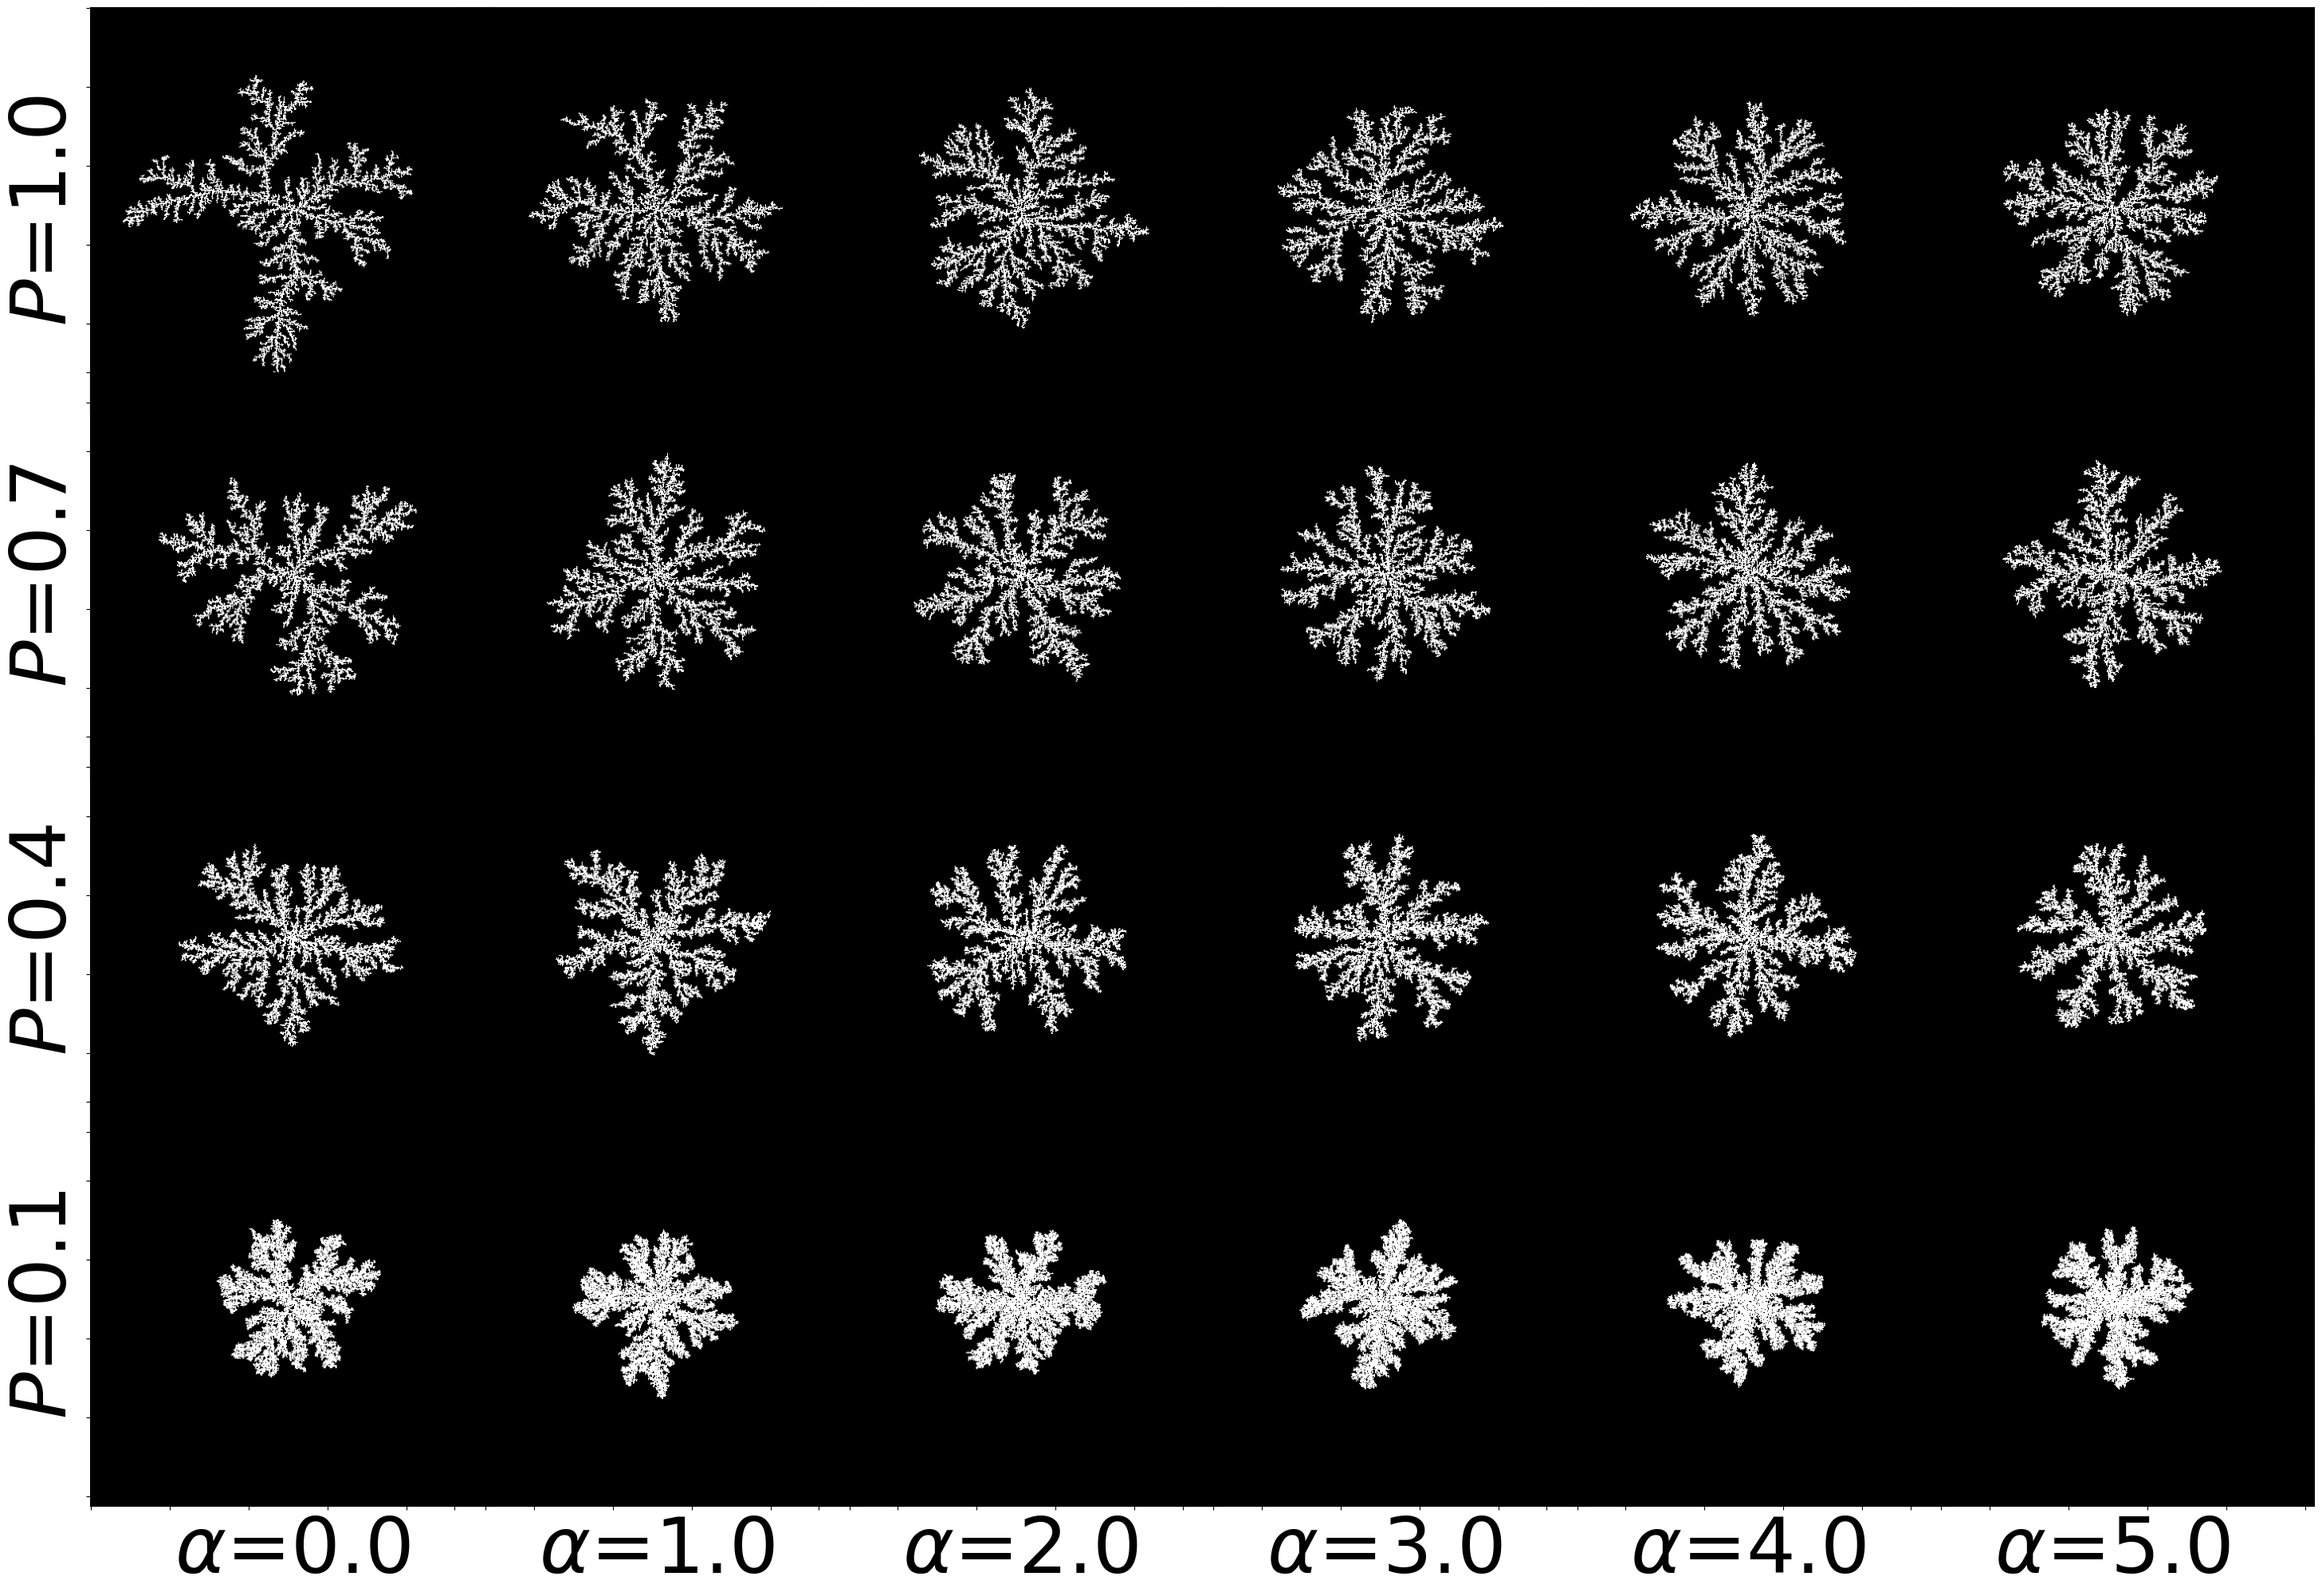

In [20]:
#DLA形状一括表示、alphaとP
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#リスト定義
p_list=[]
for i in reversed(range(1,11)):
    p_list.append(i/10)

print(p_list)
DLA=[[[]for j in range(0,11)] for i in range(len(p_list))]
for i in range(len(DLA)):
#for k in {1}:
    #フォルダ名取得&並べ替え(P小さい順)
    path='/mnt/d/master_thesis_data/densim_data/sim_data/'
    const=0.1875
    prob=p_list[i]
    #"D:\master_thesis_data\densim_data\sim_data\C=0.1875\P=0.9\DLA_data\DLA_alpha=0.000000.dat"
    #DLA_list = glob.glob('test/C=0.187500_V=1.000000/A=0.8_B=0.2_C=0.01/DLA_data/alpha=*/DLA_000.dat')
    DLA_list = glob.glob(path+'C='+str(const)+'*/P='+str(prob)+'*/DLA_data/DLA_alpha=*.dat')
    DLA_list.sort(reverse=False,key=natural_keys)
    #print(DLA_list)
    for j in range(0,len(DLA_list)):
        str_DLA=DLA_list[j] #string　of file name
        alpha=float(str_DLA[81:-4]) #return alpha
        tmp=np.loadtxt(DLA_list[j])
        DLA[i][j]=[alpha,tmp]

# column=6
# total=column*len(p_list)
# row=int((total-total%column)/column+1)
# print(total)
# fig=plt.figure(figsize=(6*column,6*row))

# for i in range(0,len(p_list)):
#     for j in range(0,column): #範囲を指定して出力
#         if j==0:
#             ax=fig.add_subplot(row,column,i*column+j+1)
#             ax.set_ylabel(r"$P$="+str(p_list[i]),fontsize=20)
#             if i==len(p_list)-1:
#                 ax.set_xlabel(r"$\alpha$="+str(DLA[i][j][0]),fontsize=20)
#             ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
#         elif i==len(p_list)-1:
#             ax=fig.add_subplot(row,column,i*column+j+1)
#             ax.set_xlabel(r"$\alpha$="+str(DLA[i][j][0]),fontsize=20)
#             ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
#         else:
#             ax=fig.add_subplot(row,column,i*column+j+1)
#             ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
#         ax.imshow(DLA[i][j][1], cmap="gray")

i_list=[i for i in range(0,len(p_list),3) ] 
column=6
total=column*len(p_list)
row=int((total-total%column)/column+1)
print(total)
fig=plt.figure(figsize=(6*column,6*row))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
print(i_list,i_list.index(9))

for i in i_list:#範囲指定して出力
    for j in range(0,column): #範囲を指定して出力
        if j==0:
            ax=fig.add_subplot(row,column,i_list.index(i)*column+j+1)
            ax.set_ylabel(r"$P$="+str(p_list[i]),fontsize=70)
            if i==i_list[len(i_list)-1]:
                ax.set_xlabel(r"$\alpha$="+str(DLA[i][j][0]),fontsize=70)
            ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        elif i==i_list[len(i_list)-1]:
            ax=fig.add_subplot(row,column,i_list.index(i)*column+j+1)
            ax.set_xlabel(r"$\alpha$="+str(DLA[i][j][0]),fontsize=70)
            ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        else:
            ax=fig.add_subplot(row,column,i_list.index(i)*column+j+1)
            ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.imshow(DLA[i][j][1], cmap="gray")

plt.show

In [7]:
# #Movie 作成用プログラム
# import re  #正規表現を行う

# def atoi(text):
#     return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

# def natural_keys(text):
#     return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

# #フォルダ名取得&並べ替え(alpha小さい順)
# const=3/16
# prob=1.0
# DLA_list = glob.glob('data/C='+str(const)+'*/V='+str(prob)+'*/movie/data/data_*.dat')
# DLA_list.sort(reverse=False,key=natural_keys)

# #リスト定義
# DLA=[[] for i in range(len(DLA_list))]

# #データ読み込み
# for i in range(0,len(DLA_list)):
#     tmp=np.loadtxt(DLA_list[i])
#     DLA[i]=[i,tmp]

# dirname = str(DLA_list[0][0:33])+'/picture/'
# os.makedirs(dirname, exist_ok=True)

# fig=plt.figure(figsize=(9,9))
# for i in range(0,len(DLA_list)): #全出力
# #for i in range(0,10): #test
#     plt.imshow(DLA[i][1], cmap="gray")
#     num='{:0>4}'.format(i)
#     filename = dirname + 'pic_'+str(num)+'.png'
#     plt.savefig(filename)
# plt.show


/tmp/ipykernel_634/2908143392.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


<function matplotlib.pyplot.show(close=None, block=None)>

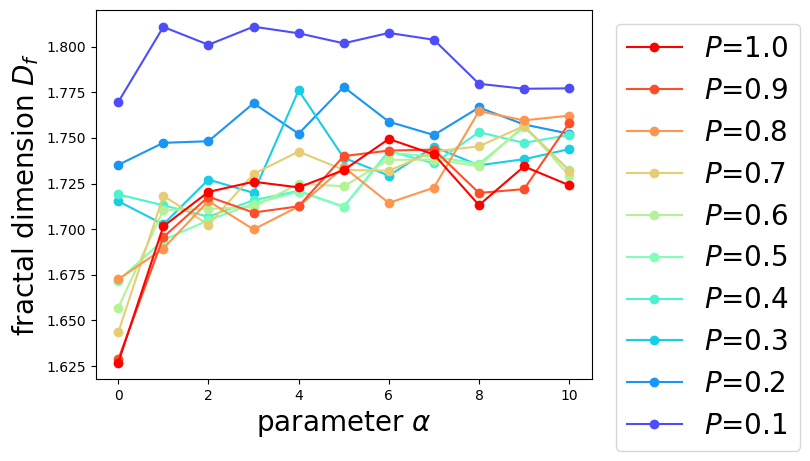

In [17]:
#フラクタル次元表示プログラム
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#固着確率用リスト
p_list=[]
for i in range(1,11):
    p_list.append(i/10)

#電圧用リスト
V_list=[]
for i in range(1,4):
    V_list.append(i*1.0)
    
fig,ax=plt.subplots()
cm = plt.cm.get_cmap('rainbow')
for k in range(len(p_list)):
#for k in {1}:
    #フォルダ名取得&並べ替え(alpha小さい順)
    const=3/16
    prob=p_list[k]
    Cor_func_list = glob.glob('data/C='+str(const)+'*/P='+str(prob)+'*/Correlation_function_data/Cor_func_alpha=*.dat')
    Cor_func_list.sort(reverse=False,key=natural_keys)

    #リスト定義
    Cor_func=[[] for i in range(len(Cor_func_list))]
    D_f=[[]for i in range (len(Cor_func_list))]
    
    
    #データ読み込み
    for i in range(0,len(Cor_func_list)):
        str_Cor_func=Cor_func_list[i] #string　of file name
        alpha=float(str_Cor_func[68:-4]) #alpha
        tmp=np.loadtxt(Cor_func_list[i])
        Cor_func[i]=[alpha,tmp]

#     column=2
#     row=int((len(Cor_func_list)-len(Cor_func_list)%column)/column+1 )

#     fig=plt.figure(figsize=(9*column,9*row))
    for i in range(0,len(Cor_func_list)): #全出力
        R_g=Cor_func[i][1][0][0]#回転半径    
        r=np.log2(Cor_func[i][1][:,1])
        C_r=np.log2(Cor_func[i][1][:,2])
        for j in range (0,len(Cor_func[i][1][:,2])):#線型フィットのindexを求める
            if (np.log2(R_g)<r[j]):
                k_max=j-1
                break
        z=np.polyfit(r[1:k_max],C_r[1:k_max],1) 

        r_line=np.arange(1,max(r)) #グラフを表示する区間
        L = np.poly1d(z) #求めたa,bを1次式で表示,ax+b
        Df=round(2+z[0],5) #フラクタル次元2+a,a<0なので2未満になる。偶数への丸めなので注意
        D_f[i]=[Cor_func[i][0],Df]

#         ax=fig.add_subplot(row,column,i+1)
#         plt.title(r"Fractal  dimension $D_f="+str(Df)+"}$",fontsize=20)
#         plt.plot(r,C_r,"o-",ls="None")
#         plt.plot(r_line, L(r_line),label=str(Df)) #線型フィットの描画
#         plt.plot(r[1:k_max],C_r[1:k_max],"o-",c="r",ls="None")
#         plt.ylabel("Density Correlation Function",fontsize=20)
#         plt.xlabel("index of radius $\log_2{r}$",fontsize=20)
#         plt.legend

    ax.plot([r[0] for r in  D_f],[r[1] for r in  D_f],"o-",label=r"$P$="+str(prob),color=cm(p_list[k]))
    hans, labs = ax.get_legend_handles_labels()
    #ax.set_title(r"$\alpha$ - $D_f$",fontsize=20)
    #ax.set_title(r"Voltage-$D_f$",fontsize=20)
    ax.set_xlabel(r"parameter $\alpha$",fontsize=20)
    ax.set_ylabel(r"fractal dimension $D_f$",fontsize=20)
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20,handles=hans[::-1], labels=labs[::-1])
    
plt.show

In [ ]:
# #loop計算打ち切りによる差の表示プログラム
# import re  #正規表現を行う

# def atoi(text):
#     return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

# def natural_keys(text):
#     return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

# #フォルダ名取得&並べ替え(dif小さい順)
# err_list = glob.glob('test/errtest/threshold/threshold_dif=*.dat')
# err_list.sort(reverse=False,key=natural_keys)

# #リスト定義
# err=[[] for i in range(len(err_list))]
  
# #データ読み込み
# for i in range(0,len(err_list)):
#     str_err=err_list[i] #string　of file name
#     dif=float(str_err[37:-4]) #threshold difference
#     tmp=np.loadtxt(err_list[i])
#     errmax=0.0
#     for j in range(0,len(abs(tmp)[0])):
#         errtmp=max(abs(tmp)[j])
#         if errtmp>errmax:
#             errmax=errtmp
#     err[i]=[dif,tmp,errmax]
    
# column=3
# row=int((len(err_list)-len(err_list)%column)/column+1 )
# #print(err[2][2])
# fig=plt.figure(figsize=(9*column,9*row))
# for i in range(0,len(err_list)): #全出力
#     ax=fig.add_subplot(row,column,i+1)
#     index=np.log10(err[i][0])
#     plt.title(r"differce of simulation-exact" "\n break difference=1.0" r"$\times 10^{"+str(index)+"}$",fontsize=20)
#     plt.imshow(err[i][1],vmin=-0.1,vmax=0.1)
#     plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both') 

# plt.show

In [ ]:
test=np.loadtxt('test/FFT_test.dat')
fig = plt.figure(figsize=(9, 9))
x=[[] for i in range(len(test))]
k=[[] for i in range(len(test))]
y=[[] for i in range(len(test))]

n=512
delta=5.0/n

for i in range (len(test)):
    x[i]=(i-n/2)*delta
    y[i]=test[i]

plt.plot(x,y)